In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn


In [2]:
df2=pd.read_csv("D:\ORGANICS.csv",encoding="cp1251") 

In [3]:
df2.head(4)

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1


In [4]:
print(df2.shape) 
print(df2.info())

(22223, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None


In [5]:
df3=df2.dropna() #df.fillna(df2.mean())
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16408 entries, 0 to 22221
Data columns (total 13 columns):
ID                 16408 non-null int64
DemAffl            16408 non-null float64
DemAge             16408 non-null float64
DemCluster         16408 non-null float64
DemClusterGroup    16408 non-null object
DemGender          16408 non-null object
DemReg             16408 non-null object
DemTVReg           16408 non-null object
PromClass          16408 non-null object
PromSpend          16408 non-null float64
PromTime           16408 non-null float64
TargetBuy          16408 non-null int64
TargetAmt          16408 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 1.8+ MB
None


In [6]:
df3['TargetBuy'].replace([0,1],['No','Buy'],inplace=True)

C:\Users\Alsu1\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [7]:
x=df3[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=df3.values[::,11]
print(x)
print(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

       DemAffl  DemAge  DemCluster  PromSpend  PromTime
0         10.0    76.0        16.0   16000.00       4.0
1          4.0    49.0        35.0    6000.00       5.0
2          5.0    70.0        27.0       0.02       8.0
3         10.0    65.0        51.0       0.01       7.0
4         11.0    68.0         4.0       0.01       8.0
5          9.0    72.0        28.0   20759.81       3.0
6         11.0    74.0         3.0       0.01       8.0
7         13.0    62.0        32.0       0.01       5.0
8         10.0    62.0        49.0    2038.76       3.0
10         7.0    60.0        52.0   11000.00       2.0
12         9.0    51.0        52.0     300.00      11.0
13         6.0    64.0        19.0       0.01       9.0
14        16.0    37.0        18.0       0.01       4.0
15         8.0    54.0        28.0    1420.00       1.0
16         5.0    70.0        15.0    6104.66       8.0
20         9.0    66.0        49.0     500.00      12.0
21         9.0    74.0         8.0    6000.00   

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
tree_entropy=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [10]:
tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [11]:

tree_entropy.score(X_train, y_train)# результат на обучающей выборке


0.7912059207662168

In [12]:
tree_entropy.score(X_test,y_test) # результат на тестовой выборке- число правильных результатов

0.7940280316879951

In [13]:
tree_entropy.predict([[4.0,49.0,35.0, 6000.00,5.0]]) # прогноз

array(['No'], dtype=object)

In [14]:
#число неправильно классифицированных объектов
y_pred = tree_entropy.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 1014


[Text(167.4, 190.26, 'X[1] <= 44.5\nentropy = 0.831\nsamples = 11485\nvalue = [3016, 8469]'),
 Text(83.7, 135.9, 'X[0] <= 11.5\nentropy = 0.996\nsamples = 3081\nvalue = [1657, 1424]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 39.5\nentropy = 0.99\nsamples = 2248\nvalue = [991, 1257]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.999\nsamples = 1379\nvalue = [712, 667]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.906\nsamples = 869\nvalue = [279, 590]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 14.5\nentropy = 0.723\nsamples = 833\nvalue = [666, 167]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.849\nsamples = 523\nvalue = [379, 144]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.381\nsamples = 310\nvalue = [287, 23]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 11.5\nentropy = 0.638\nsamples = 8404\nvalue = [1359, 7045]'),
 Text(209.25, 81.53999999999999, 'X[0] <= 7.5\nentropy = 0.531\nsamples = 7080\nvalue = [854, 6226]'),
 Text(188.32500000000

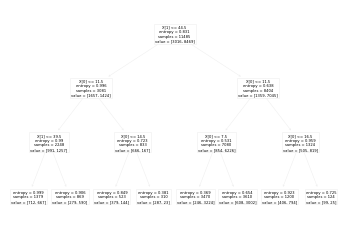

In [15]:
from sklearn import tree
tree.plot_tree(tree_entropy.fit(X_train, y_train)) # вывод дерева

In [19]:
#кросс валидация
#настроим параметры дерева на кросс-валидации: максимальную глубину 
#и максимальное используемое на каждом разбиении число признаков.

from sklearn.model_selection import GridSearchCV, cross_val_score
tree_params = {'max_depth': range(1,10),'max_features': range(1,6)}
# будет проведена 5-кратная кросс-валидация 
tree_grid = GridSearchCV(tree_entropy, tree_params,cv=5, n_jobs=-1,verbose=True)
tree_grid.fit(X_train, y_train)



Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'max_features': range(1, 6)},
             pre_dispatch='2*n_job

In [17]:
#и выберется лучшее сочетание параметров.
tree_grid.best_params_


{'max_depth': 4, 'max_features': 5}

In [48]:
from sklearn import metrics 
metrics.accuracy_score(y_train, tree_grid.predict(X_train))

0.800870700914236

Confusion matrix, without normalization
[[ 670  556]
 [ 478 3219]]


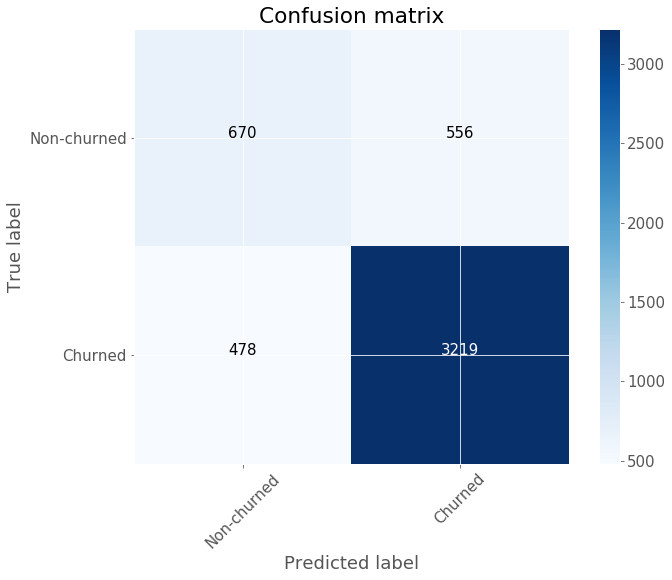

In [88]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
  
    for i in range (cm.shape[0]): 
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, tree_entropy.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'], title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [37]:
# метрики качества прогнозов на основе матрицы ошибок (TP + TN) / float(TP + TN + FP + FN))
#Точность классификации: В целом, как часто верен классификатор?
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))


0.7940280316879951


In [38]:
# Classification Error: Overall, how often is the classifier incorrect? как часто ошибается клаассификатор ?

#Also known as "Misclassification Rate"
#classification_error = (FP + FN) / (TP + TN + FP + FN)

print(1 - accuracy_score(y_test, y_pred))


0.20597196831200493


In [50]:
report = classification_report(y_test, tree_entropy.predict(X_test), target_names=['Non-churned', 'Churned'])
print(report)

              precision    recall  f1-score   support

 Non-churned       0.65      0.49      0.56      1309
     Churned       0.83      0.90      0.87      3614

    accuracy                           0.79      4923
   macro avg       0.74      0.70      0.71      4923
weighted avg       0.78      0.79      0.78      4923



In [17]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [32]:
#bagging
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression

bag_model=BaggingClassifier(base_estimator=tree_entropy, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(X_train,y_train)
ytest_pred=bag_model.predict(X_test)
print(bag_model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred)) 



0.8062157221206582
[[ 670  556]
 [ 478 3219]]


In [34]:
 from sklearn.model_selection import cross_val_score

from sklearn.ensemble import AdaBoostClassifier

In [85]:
#boosting
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, x, y, cv=5)
scores.mean() 

0.7990615924122062

In [49]:

clf  =  clf.fit (x ,y)
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, x, y, cv=5)
scores.mean() 


0.6991103097422959

In [53]:
 from sklearn.ensemble  import  RandomForestClassifier 

clf = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, x, y, cv=5)
scores.mean()

0.7829113424456843

In [15]:

from sklearn.tree import export_graphviz

import subprocess

export_graphviz(tree_entropy, feature_names=['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime'],
                out_file='E:/Organics_tree.dot' ,
               rounded = True, proportion = False, 
                precision = 2, filled = True)

FileNotFoundError: [Errno 2] No such file or directory: 'E:/Organics_tree.dot'

In [16]:
import pydot 
(graph, ) = pydot.graph_from_dot_file('E:/Organics_tree.dot')


FileNotFoundError: [Errno 2] No such file or directory: 'E:/Organics_tree.dot'

In [17]:
graph.write_png('E:/Organics_tree.png')

NameError: name 'graph' is not defined

In [18]:
print("Важности признаков:\n{}".format(tree_entropy.feature_importances_))

Важности признаков:
[0.39850957 0.60149043 0.         0.         0.        ]


In [19]:
for name, score in zip(tree_entropy["feature_names"], tree_entropy.feature_importances_):
 print(name, score)


TypeError: 'DecisionTreeClassifier' object is not subscriptable

In [20]:
def plot_feature_importances_cancer(model):
 n_features = cancer.data.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), cancer.feature_names)
 plt.xlabel("Важность признака")
 plt.ylabel("Признак")
plot_feature_importances_cancer(tree_entropy)

NameError: name 'cancer' is not defined

9

hhhhhh
